<a href="https://colab.research.google.com/github/raminguyen/cs666student/blob/main/Rami_CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

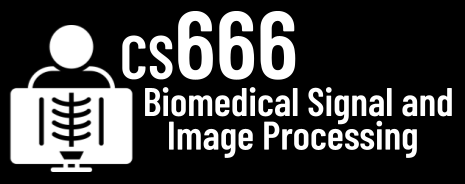

# Assignment 1

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.12/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plot', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


**Task 1** (5 pts): Install the BioSPPY library with the following code.

In [ ]:
!pip install biosppy peakutils

**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset. Note: this might fail with an import error, but should be an easy fix :)

In [ ]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

In [ ]:
!pip install peakutils

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [ ]:
signal

array([2044., 2044., 2044., ..., 2044., 2045., 2043.])

In [ ]:
metadata

{'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}

In [ ]:
sampling_rate = metadata['sampling_rate']
sampling_rate

1000.0

In [ ]:
total_samples = len(signal)
total_samples

15000

In [ ]:
SAMPLING_RATE = 1000 ### TODO!
SECONDS = total_samples / sampling_rate  ### TODO!
SECONDS

15.0

**Task 4** (15 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

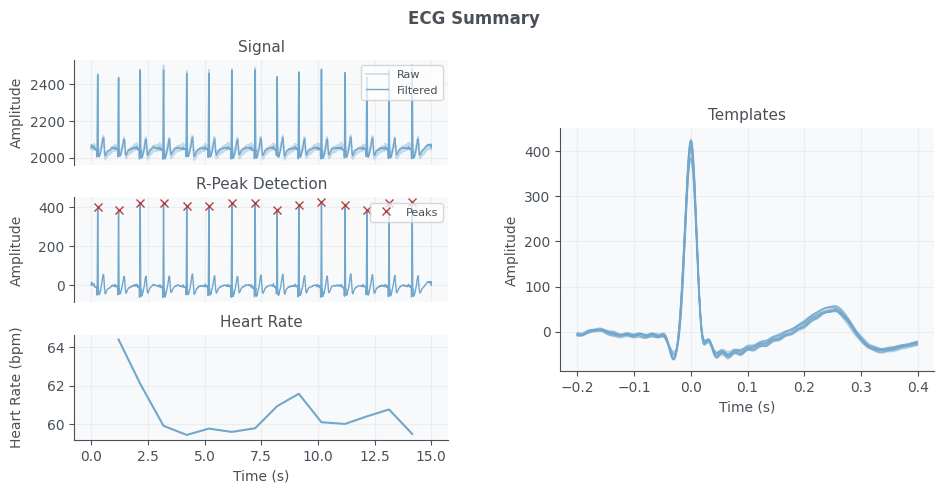

In [ ]:
### TODO

from biosppy.signals import ecg

out = ecg.ecg(signal=signal, sampling_rate=sampling_rate, show=True)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

In [ ]:
### TODO plot unfiltered signal

In [ ]:
sample_3sec = signal[0:3000] #first3seconds

In [ ]:
time_3sec = np.arange(len(sample_3sec)) / sampling_rate
time_3sec

array([0.000e+00, 1.000e-03, 2.000e-03, ..., 2.997e+00, 2.998e+00,
       2.999e+00])

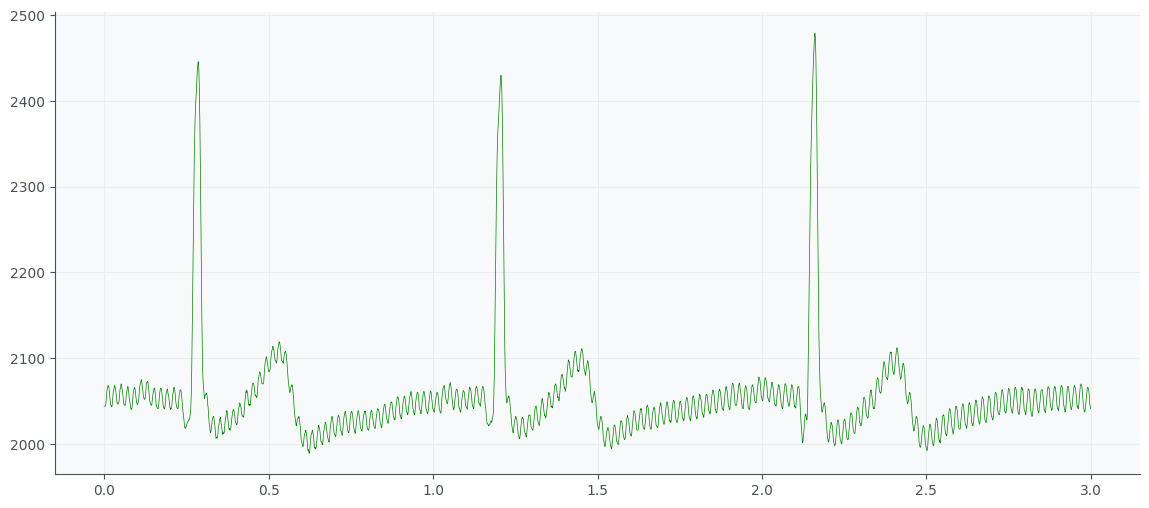

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.plot(time_3sec, sample_3sec, 'g-', linewidth=0.5)

In [ ]:
### TODO plot filtered signal

In [ ]:
from scipy.signal import butter, lfilter

def bandpass_filter(data, lowcut, highcut, sampling_rate, order=5):
    nyq = 0.5 * sampling_rate
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

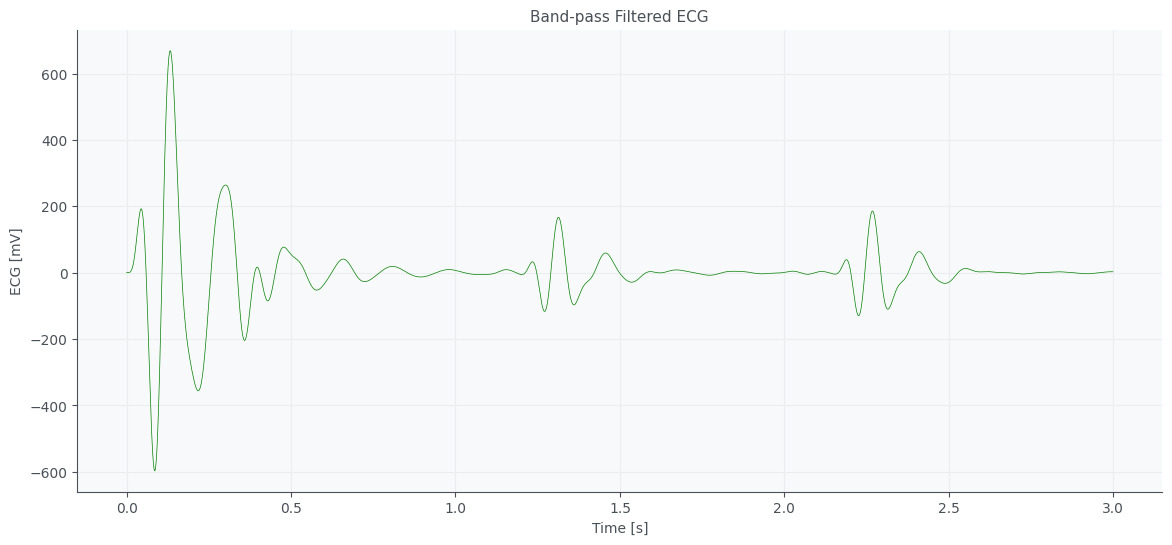

In [ ]:
lowcut= 5
highcut= 15

filtered_ecg = bandpass_filter(signal, lowcut, highcut, sampling_rate, order=5)
filtered_ecg

plt.figure(figsize=(14, 6))
plt.plot(time_3sec, filtered_ecg[:3000], 'g-', linewidth=0.5)
plt.title('Band-pass Filtered ECG')
plt.xlabel('Time [s]')
plt.ylabel('ECG [mV]')
plt.show()


I think unfiltered is better for seeing P, Q, R, S, T waves. The filtered signal removed too many important frequencies including P-waves, T-waves, and the sharp QRS components, which distorted the ECG shape.


**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

In [ ]:
### TODO

full_filtered = out['filtered']
full_filtered

array([-0.50199549,  2.3546002 ,  5.11019598, ...,  6.38401982,
        2.99312361, -0.52551572])

In [ ]:
r_peaks_biosppy = np.array(out['rpeaks'])
r_peaks_biosppy


array([  283,  1204,  2159,  3188,  4211,  5188,  6200,  7232,  8200,
        9157, 10156, 11198, 12159, 13139, 14162])

In [ ]:
time = np.arange(len(full_filtered)) / sampling_rate

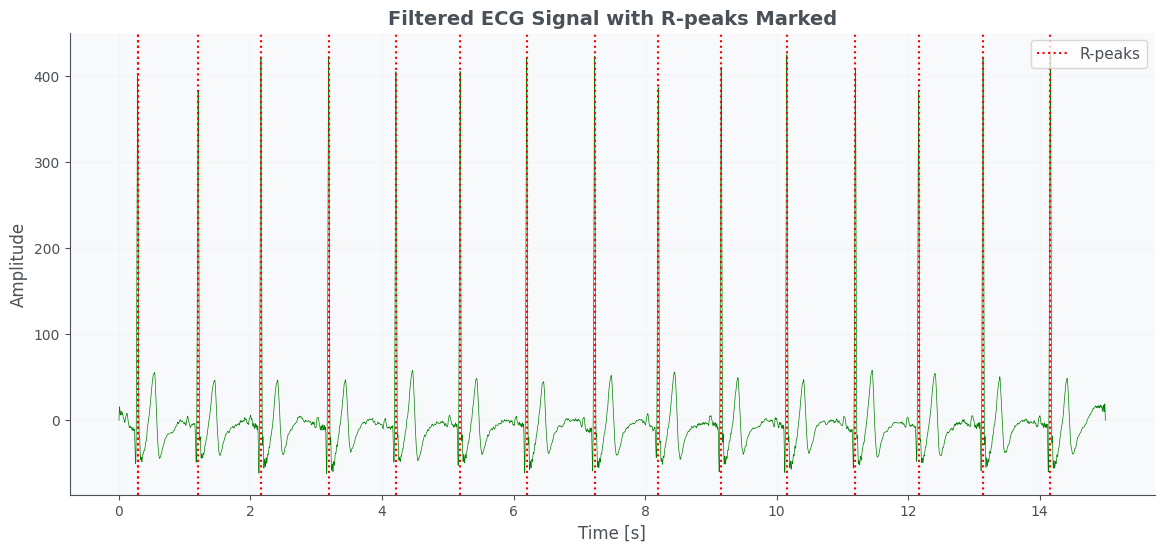

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(time, full_filtered, 'g-', linewidth=0.5)

for peak in r_peaks_biosppy:
    plt.axvline(x=peak/sampling_rate, color='r', ls=':')

plt.axvline(x=r_peaks_biosppy[0]/sampling_rate, color='r', linestyle=':',
            linewidth=1.5, label='R-peaks')

plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.title('Filtered ECG Signal with R-peaks Marked', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [ ]:
!pip install neurokit2
import neurokit2 as nk

**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

In [ ]:
# TODO Does the detection work well?

In [ ]:
from neurokit2 import ecg_delineate

_, waves_peak = nk.ecg_delineate(signal, r_peaks_biosppy, sampling_rate=sampling_rate, method="peak")

In [ ]:
waves_peak['ECG_T_Peaks'][:3]

[np.int64(532), np.int64(1452), np.int64(2410)]

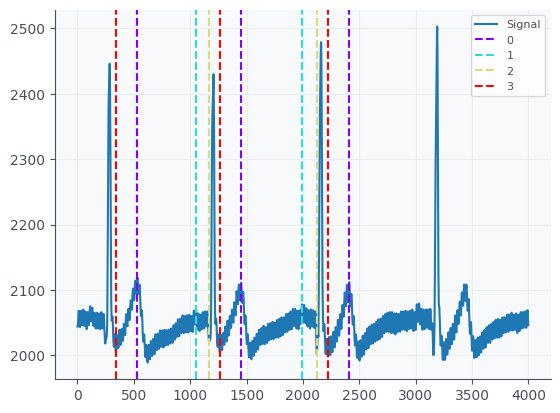

In [ ]:
# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3],
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]],
                      signal[:4 * int(sampling_rate)])

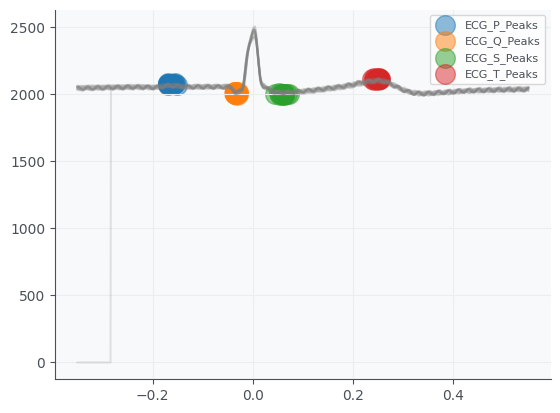

In [ ]:
_, waves_peak = nk.ecg_delineate(signal,
                                 r_peaks_biosppy,
                                 sampling_rate=sampling_rate,
                                 method="peak",
                                 show=True,
                                 show_type='peaks')

The detection works very well, as it can identify all ECG peaks for this piece of ECG signal.

**Task 9** (10 pts): Use the sleepecg library to find the R Peaks.

In [ ]:
# We have the R spikes/peaks now from Biosppy from above but there is another
# library called sleepecg.
# TODO Please install it and run the rpeak detection!
# Docs: https://sleepecg.readthedocs.io/en/stable/

In [ ]:
!pip install sleepecg

In [ ]:
import sleepecg

r_peaks_sleepecg = sleepecg.detect_heartbeats(ecg=signal, fs=sampling_rate)

r_peaks_sleepecg

array([  283,  1203,  2158,  3188,  4211,  5188,  6200,  7232,  8200,
        9157, 10155, 11198, 12159, 13139, 14162])

In [ ]:
# TODO Do Biosppy and sleepecg give different rpeaks? Please calculate the MSE!

In [ ]:
len(r_peaks_sleepecg)

15

In [ ]:
r_peaks_sleepecg

array([  283,  1203,  2158,  3188,  4211,  5188,  6200,  7232,  8200,
        9157, 10155, 11198, 12159, 13139, 14162])

In [ ]:
r_peaks_biosppy

array([  283,  1204,  2159,  3188,  4211,  5188,  6200,  7232,  8200,
        9157, 10156, 11198, 12159, 13139, 14162])

In [ ]:
mse = np.mean((r_peaks_sleepecg - r_peaks_biosppy)**2)
print(mse)

0.2


**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass.
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

In [ ]:
# Finally, run the delineation on the filtered signal from BioSPPY.

In [ ]:
# TODO Which one works the best?

In [ ]:
_, waves1 = nk.ecg_delineate(signal, r_peaks_biosppy, sampling_rate=sampling_rate, method="peak")

In [ ]:
filtered = nk.signal_filter(signal, sampling_rate=sampling_rate, lowcut=5, highcut=15)
filtered

array([1.12566926, 1.71798041, 2.29748542, ..., 1.22664104, 1.08611229,
       0.94851742])

In [ ]:
_, waves2 = nk.ecg_delineate(filtered, r_peaks_biosppy, sampling_rate=sampling_rate, method="peak")

In [ ]:
p1 = np.array(waves1['ECG_P_Peaks'][1:5]).astype(int)
q1 = np.array(waves1['ECG_Q_Peaks'][1:5]).astype(int)
s1 = np.array(waves1['ECG_S_Peaks'][1:5]).astype(int)
t1 = np.array(waves1['ECG_T_Peaks'][1:5]).astype(int)

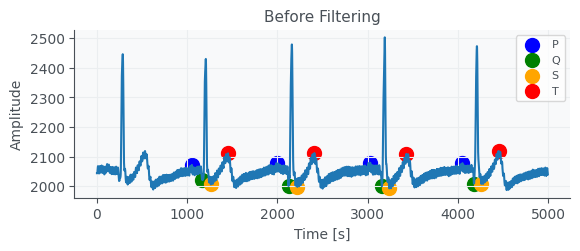

In [ ]:
# Before

plt.subplot(2, 1, 1)
plt.plot(signal[:5000])
plt.scatter(p1, signal[p1], color='blue', s=100, label='P')
plt.scatter(q1, signal[q1], color='green', s=100, label='Q')
plt.scatter(s1, signal[s1], color='orange', s=100, label='S')
plt.scatter(t1, signal[t1], color='red', s=100, label='T')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Before Filtering')
plt.legend()

In [ ]:
# After
p2 = np.array(waves2['ECG_P_Peaks'][1:5]).astype(int)
q2 = np.array(waves2['ECG_Q_Peaks'][1:5]).astype(int)
s2 = np.array(waves2['ECG_S_Peaks'][1:5]).astype(int)
t2 = np.array(waves2['ECG_T_Peaks'][1:5]).astype(int)

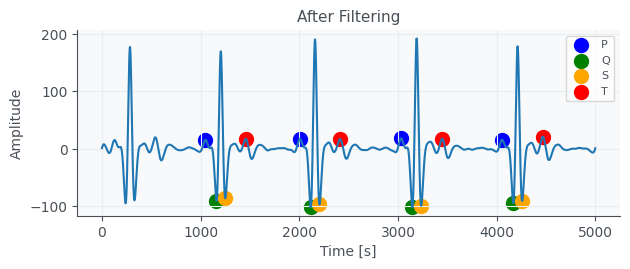

In [ ]:
plt.subplot(2, 1, 2)
plt.plot(filtered[:5000])

plt.scatter(p2, filtered[p2], color='blue', s=100, label='P')
plt.scatter(q2, filtered[q2], color='green', s=100, label='Q')
plt.scatter(s2, filtered[s2], color='orange', s=100, label='S')
plt.scatter(t2, filtered[t2], color='red', s=100, label='T')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('After Filtering')
plt.legend()

plt.tight_layout()

I think after filtering is best for peak detection. The filtered signal has less noise and a stable baseline. Thus, it is making P, Q, S, and T peaks much easier to detect accurately.

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#